# Exercises Electric Machinery Fundamentals
## Chapter 6

## Problem 6-20

**Note:** *You should first click on "`Cell` &rarr; `Run All`" in order that the plots get generated.*

In [1]:
%pylab inline
%config InlineBackend.figure_formats = ['svg']
%precision 3

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


'%.3f'

### Description

A 208-V six-pole Y-connected 25-hp design class B induction motor is tested in the laboratory, with the following results:

* No load: 208 V, 24.0 A, 1400 W, 60 Hz
* Locked rotor: 24.6 V, 64.5 A, 2200 W, 15 Hz
* Dc test: 13.5 V, 64 A

Based on those measurements:

* Find the equivalent circuit of this motor, and plot its torque-speed characteristic curve.

In [2]:
Vnl =  208.0 # [V]
Inl =   24.0 # [A]
Pnl = 1400.0 # [W]
fnl =   60.0 # [Hz]
Vlr =   24.6 # [V]
Ilr =   64.5 # [A]
Plr = 2200.0 # [W]
flr =   15.0 # [Hz]
Vdc =   13.5 # [V]
Idc =   64.0 # [A]

### SOLUTION

From the DC test,

<img src="figs/Problem_6-20a.jpg" width="30%">

In [3]:
R1 = Vdc/Idc  /  2
print('''
R1 = {:.3f} Ω
============'''.format(R1))


R1 = 0.105 Ω


In the no-load test, the line voltage is 208 V, so the phase voltage is:

In [4]:
Vnl_phase = Vnl / sqrt(3)
print('Vnl_phase = {:.0f} V'.format(Vnl_phase))

Vnl_phase = 120 V


Therefore,

$$X_1 + X_M = \frac{V_\phi}{I_\text{A,nl}}$$

In [5]:
X1_Xm = Vnl_phase / Inl
print('X1 + Xm = {:.2f} Ω @ {:.0f} Hz'.format(X1_Xm, fnl))

X1 + Xm = 5.00 Ω @ 60 Hz


In the locked-rotor test, the line voltage is 24.6 V, so the phase voltage is:

In [6]:
Vlr_phase = Vlr / sqrt(3)
print('Vlr_phase = {:.1f} V'.format(Vlr_phase))

Vlr_phase = 14.2 V


From the locked-rotor test at 15 Hz ,
$$|Z'_{LR}| = |R_{LR} + jX'_{LR}| = \frac{V_\phi}{I_{A,LR}}$$

In [7]:
z_lr = Vlr_phase / Ilr
Slr = sqrt(3) * Vlr * Ilr
theta_lr = arccos(Plr / Slr)
print('''
z_lr     = {:.3f} Ω
theta_lr = {:.2f}°'''.format(z_lr, theta_lr))


z_lr     = 0.220 Ω
theta_lr = 0.64°


Therefore,
$$R_{LR} = |Z'_{LR}| \cos{\theta_{LR}}$$

In [8]:
Rlr = z_lr * cos(theta_lr)
print('Rlr = {:.3f} Ω'.format(Rlr))

Rlr = 0.176 Ω


In [9]:
R2 = Rlr - R1
print('''
R2 = {:.3f} Ω
============'''.format(R2))


R2 = 0.071 Ω


$$X'_{LR} = |Z'_{LR}| \sin{\theta_{LR}}$$

In [10]:
X_lr = z_lr * sin(theta_lr)
print('X_lr = {:.3f} Ω @ {:.0f} Hz'.format(X_lr, flr))

X_lr = 0.132 Ω @ 15 Hz


At a frequency of 60 Hz,

In [11]:
Xlr = (60 / flr) *X_lr
print('Xlr = {:.3f} Ω @ 60 Hz'.format(Xlr))

Xlr = 0.528 Ω @ 60 Hz


For a Design Class B motor, the split is $X_1 = 0.4 \cdot X_{LR}$ and $X_2 = 0.6 \cdot X_{LR}$ .

In [12]:
X1 = 0.4 * Xlr; X1

0.211

In [13]:
X2 = 0.6 * Xlr; X2

0.317

Therefore,

In [14]:
Xm = X1_Xm - X1
print('''
Xm = {:.3f} Ω
============'''.format(Xm))


Xm = 4.793 Ω


The resulting equivalent circuit is shown below:

<img src="figs/Problem_6-20b.jpg" width="70%">

**Plotting the torque-speed characteristic:**

Calculate the Thevenin voltage and impedance:

In [15]:
V_th = Vnl_phase * ( Xm / sqrt(R1**2 + (X1 + Xm)**2) )
Z_th = ((Xm*1j) * (R1 + X1*1j)) / (R1 + (X1 + Xm)*1j)
R_th = real(Z_th)
X_th = imag(Z_th)

Now calculate the torque-speed characteristic for many slips between 0 and 1. Note that the first slip value is set to 0.001 instead of exactly 0 to avoid divide-by-zero problems.

In [16]:
s = linspace(0,50,51) / 50 # generate an array with 51 values between 0 and 50
s[0] = 0.001               # avoid division by zero
p = 6                      # number of poles
n_sync = 60/(p/2) * fnl    # [r/min]
w_sync = 2*pi/60 *n_sync   # [rad/s]
nm = (1-s) * n_sync

Calculate torque versus speed

In [17]:
tau_ind = (3 * V_th**2 * R2 / s)  /  (w_sync * ((R_th + R2/s)**2 + (X_th + X2)**2) )

Plot the torque-speed curve:

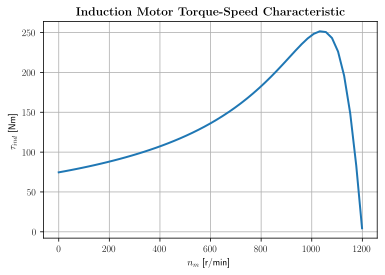

In [18]:
rc('text', usetex=True)   # enable LaTeX commands for plot
title(r'\bf Induction Motor Torque-Speed Characteristic')
xlabel(r'$n_m$ [r/min]')
ylabel(r'$\tau_{ind}$ [Nm]')
plot(nm, tau_ind,  linewidth = 2)
grid()